# PCA(주성분 분석, Principal Component Analysis)
고차원의 데이터를 저차원의 데이터로 축소시키는 차원 축소 방법 중 하나입니다.

#### PCA의 동작 과정
1. 데이터 표준화 및 원점 이동
- 단위 통일 및 데이터의 중심 지점이 원점이 되도록 위치 이동

2. 주성분 찾기
- 주성분: 데이터들의 중심(원점)을 지나면서 모든 데이터들에서의 수직 거리의 합이 가장 가깝도록 하는 선

3. 데이터 투영하기
- 투영: 쉽게 얘기해서 데이터들을 주성분 위로 옮기는 과정을 의미

4. 새로운 축 기준으로 데이터 회전하기
- 새롭게 만들어진 변수인 첫 번째 주성분(PC1)과 두 번째 주성분(PC2)이 각각 x축과 y축이 될 수 있도록 축과 데이터 전체를 회전
- 만약에 2차원인 데이터를 1차원으로 줄이고 싶다면 PC1만을 사용해서 데이터를 나타내면 됩니다.
- 2차원으로 나타내려면 PC1과 PC2 두 개의 축으로 이루어진 좌표 평면에 데이터들을 표현

In [12]:
import pandas as pd
# 표준화된 고객 정보 데이터 scaled_df를 활용
scaled_df = pd.read_csv('data/scaled_df.csv')
scaled_df

,recency,age,children,spent_all,purchase_num_all,family_size
0,0.31,1.02,-1.26,1.68,1.32,-1.76
1,-0.38,1.27,1.40,-0.96,-1.16,0.45
2,-0.80,0.33,-1.26,0.28,0.80,-0.66
3,-0.80,-1.29,0.07,-0.92,-0.90,0.45
4,1.55,-1.03,0.07,-0.31,0.54,0.45
...,...,...,...,...,...,...
2232,-0.11,0.16,0.07,1.22,0.41,0.45
2233,0.24,1.96,2.72,-0.27,0.93,2.65
2234,1.45,-1.03,-1.26,1.06,0.54,-1.76
2235,-1.42,1.10,0.07,0.39,1.06,0.45


In [13]:
from sklearn.decomposition import PCA

# 모델 생성
pca = PCA(n_components=2) # n_components: PCA를 통해 차원을 몇 개로 축소할 것인지를 정함

fit() 메소드는 데이터를 통해 PCA를 학습합니다.    
이 과정에서 미리 설정한 n_components개의 주성분을 찾습니다.    
transform() 메소드는 학습된 PCA 모델을 바탕으로 데이터를 변환합니다. 

In [14]:
pca.fit(scaled_df)  # PCA 학습
scaled_df_pca = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pca)  # 데이터프레임으로 변환

pca_df.columns = ['PC1', 'PC2']  # 데이터프레임 컬럼 이름 지정

pca_df.head()

,PC1,PC2
0,-3.04,0.65
1,1.93,0.53
2,-1.50,-0.12
3,1.17,-1.37
4,0.23,-0.08


<Axes: xlabel='PC1', ylabel='PC2'>

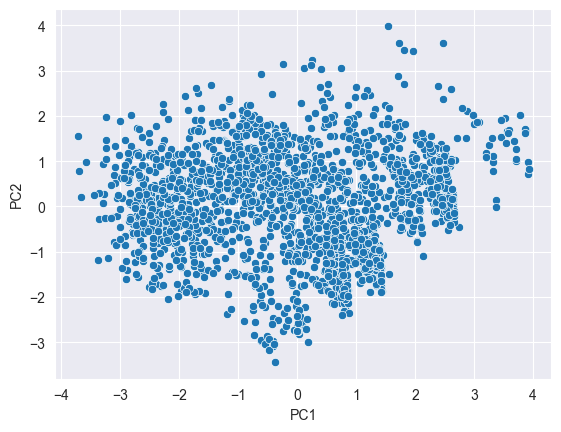

In [15]:
# 산점도 시각화
import seaborn as sns
sns.scatterplot(data=pca_df, x ='PC1', y='PC2')

시각화된 결과를 보면 PC1의 분포는 -4에서 4로 PC2의 분포인 -3에서 4보다 조금 더 넓게 분포해 있는 것이 확인됩니다.

#### Scree plot
PCA를 적용할 때 몇 개의 주성분으로 차원을 축소시킬지 정해야 되는데요. 이때 Scree plot이란 게 사용됩니다.   
Scree plot은 각 주성분이 전체 데이터에 대해서 갖는 설명력 비율을 시각화한 플롯입니다. 좀 더 정확하게 얘기하면, 전체 주성분의 분산 대비 특정 주성분의 분산의 비율을 시각화한 것입니다.

In [16]:
pca = PCA(n_components = 6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.04,0.65,-0.25,0.70,-0.07,0.38
1,1.93,0.53,0.43,1.26,0.09,0.64
2,-1.50,-0.12,0.80,0.38,-0.37,-0.55
3,1.17,-1.37,0.67,-0.61,0.04,-0.29
4,0.23,-0.08,-1.55,-1.11,-0.46,-0.38


이젠 6개의 PC가 각각 전체 데이터에 대해서 어느 정도의 설명력을 가지는지, 즉 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인해 보겠습니다.   
각 주성분의 분산 비율을 계산하기 위해서는 scikit-learn의 PCA에 있는 explained_variance_ratio_ 속성을 활용하면 됩니다.

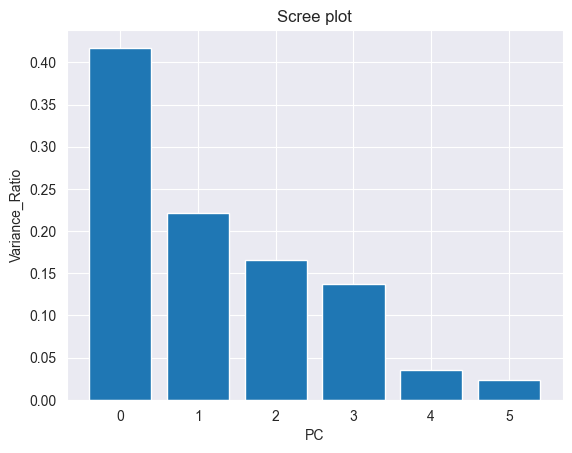

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

주성분 1(PC1)은 전체 주성분이 설명해 주는 데이터의 특성 대비 약 40% 정도를 설명하고, 주성분 2(PC2)는 약 20% 정도를 설명하고 있네요.

플롯의 결과를 바탕으로 최적의 주성분 개수를 구해야 하는데요. 기준은 간단합니다. 바로, PC1부터 PC_N까지 분산 비율의 합을 누적했을 때 전체 대비 70% 이상이 되는 PC_N을 고르면 됩니다. 그래도 전체 분산 대비 분산 비율이 70%는 되어야 원본 데이터가 충분히 설명된다고 보는 거죠.

주성분들의 누적 분산 비율은 코드로 아래와 같이 계산할 수 있는데요.



In [18]:
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.42
PC2,0.64
PC3,0.80
PC4,0.94
PC5,0.98
PC6,1.00


결과를 확인하니 3개의 주성분(PC1, PC2, PC3)이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비 약 80% 정도를 설명하는 것으로 나옵니다. 즉, 해당 경우에는 주성분을 3개로 차원을 축소하는 게 적절하다고 할 수 있습니다.      

물론, 70%가 절대적인 기준은 아닙니다. 데이터의 복잡성과 분석 목적에 따라 충분히 달라질 수 있죠. 예를 들어, 데이터가 상대적으로 단순하면 70% 이상의 누적 설명력을 충족하는 주성분 개수를 선택하는 것으로 충분할 수 있습니다. 반면에, 데이터가 복잡하고 누적 설명력이 높아야 하는 경우에는 80% 이상, 혹은 더 높은 누적 설명력을 가지는 주성분 개수를 선택해야 할 수도 있습니다. 또한, 분석의 목적 상 차원이 높은 데이터를 시각화하여 데이터의 특징을 파악하는 게 필요할 수도 있는데요. 그럴 경우에는 Scree plot의 결과와 상관없이 차원을 2개 또는 3개로 축소시키기도 합니다.

#### PCA의 특징
PCA만이 가지는 가장 대표적인 특성은 데이터가 가진 중요한 정보를 최대한 보존하면서 차원을 축소한다는 점입니다. 

In [19]:
user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


해당 데이터를 5차원으로 줄이기 위해선 챕터 1에서 했던 것처럼 의미가 비슷한 family_size와 children 중 하나의 변수를 탈락시키면 됐습니다. 그렇게 하면 특정 변수가 가진 고유한 정보가 데이터에서 삭제되긴 하지만, 그래도 공통된 의미를 설명하는 부분이 큰 변수 중 하나를 삭제했으니 정보 손실이 엄청 크다고 할 순 없는데요. 하지만, 6차원 데이터를 차원 선택으로 2차원으로 줄이려면 어떻게 해야 할까요? 변수 간의 의미를 아무리 잘 고려하여 삭제할 변수를 선택하더라도 정보의 손실이 커지는 것을 막긴 어렵겠죠? 만약에 family_size와 spent_all이라는 두 변수만 선택했다면 다른 변수들에 있던 여러 정보가 이후 분석에 반영되지 못하게 되는 것인데요.

PCA로 6차원을 2차원으로 축소시킬 경우, 새롭게 찾아진 두 개의 변수 PC1과 PC2는 6개 변수가 가진 정보를 종합적으로 고려하여 찾아진 변수이기 때문에 여러 변수들의 정보 손실을 최소화할 수 있습니다. 아래 예시만 봐도, 2개의 주성분으로 차원을 줄였을 때 기존 6개 변수가 가진 정보 중 약 65%가량이 보존된다는 것을 알 수 있죠.

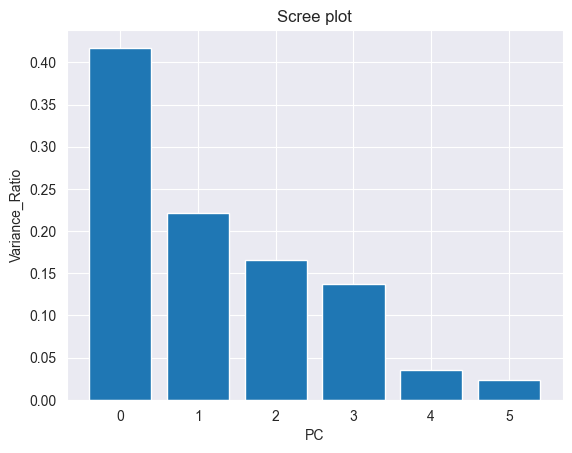

In [20]:
# 주성분의 설명력 확인
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var)  # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

이렇게 변수가 가진 정보를 최대한 보존하는 방식으로 차원을 줄인다는 것이 PCA의 가장 큰 장점입니다. 데이터가 가진 변수의 정보를 잘 보존해 주기 때문에 PCA를 통해 차원을 축소시킨 데이터를 활용하여 예측 모델을 학습시키면 더 정확하고 일반화된 결과물을 얻을 수 있습니다.

하지만, 단점도 있습니다. 먼저, PCA의 결과로 찾아진 주성분의 의미를 해석하는 것이 어렵습니다. 주성분은 변수들 안에 포함된 여러 정보를 종합적으로 고려하여 새롭게 추출된 차원인데요. 하나의 주성분이 하나의 변수와 매칭되는 것이 아니라 여러 변수의 영향력을 종합적으로 받고 있기 때문에 결과로 확인된 주성분이 무엇을 의미하는지 명확하게 정의하기가 어렵습니다.

또한, PCA는 거의 모든 데이터의 정보를 최대한 유지하는 방향으로 주성분을 추출해 주는데요. 해당 과정에 많은 연산이 필요합니다. 즉, 차원이 더 높은 데이터를 축소시킬수록 계산 비용이 급격히 증가되며 연산 시간이 오래 걸린다는 문제가 있죠. 따라서, PCA를 사용하기 전에는 데이터의 차원과 크기, 연산 환경을 고려하는 것이 필요하다는 단점이 있습니다.